# CHURN_MODEL

We would be dealing with Churn Modeling i.e. we would be writing a Artificial Neural Network to find out reasons as to why and which customers are actually leaving the bank and their dependencies on one another.

This is a classification problem 0-1 classification(1 if Leaves 0 if customer stays).

We can use theano or tensorflow for this, but using these libraries require to write most of the code of ML from scratch,
so I am gonna use "KERAS" which will enable me to write powerful Neural Networks with a few lines of code.

Keras runs on Theano and Tensorflow and you can think it of as a Sklearn for Deep Learning.

# Artificial Neural Network

# Part-1: Pre-processing the data

In [114]:
import os

os.getcwd()

'C:\\Users\\Bikash\\Desktop\\PYTHON\\ARTIFICIAL INTELLIGENCE\\PROJECT DATASET\\PROJECT ON CHURN MODELLING'

In [116]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

In [117]:
# Importing the data

churn_data = pd.read_csv("Churn_Modelling.csv")
churn_data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [118]:
churn_data.tail(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [119]:
print(churn_data.isnull().values.any())         ##  checking for missing values and capturing the count
churn_data.isnull().sum()

False


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [120]:
churn_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


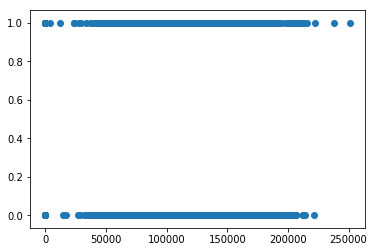

In [121]:
plt.scatter(x = churn_data["Balance"], y = churn_data["Exited"])
plt.show()

In [122]:
# Looking at the features we can see that row no.,surname will have no relation with a customer with leaving the bank
# so we drop them from X which contains the features Indexes from 3 to 12

X = churn_data.iloc[:, 3:13].values

In [123]:
#We store the Dependent value/predicted value in y by storing the 13th index in the variable y

y = churn_data.iloc[:, 13].values

In [124]:
#Printing out the values of X --> Which contains the features

print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [125]:
# printing out the values of y --> Which contains the target variable

print(y)

[1 0 1 ... 1 1 0]


# Encoding categorical data

In [126]:
# Now we encode the string values in the features to numerical values.
# The only 2 values are "Gender" and "Region" which need to converted into numerical data.

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()


In [127]:
#creating label encoder object no. 1 to encode Geography name(index 1 in features)

X[:, 1] = labelencoder_X.fit_transform(X[:, 1])          #encoding Geography from string to just 3 no.s 0,1,2 respectively
print(X)

[[619 0 'Female' ... 1 1 101348.88]
 [608 2 'Female' ... 0 1 112542.58]
 [502 0 'Female' ... 1 0 113931.57]
 ...
 [709 0 'Female' ... 0 1 42085.58]
 [772 1 'Male' ... 1 0 92888.52]
 [792 0 'Female' ... 1 0 38190.78]]


In [128]:
#creating label encoder object no. 2 to encode Gender name(index 2 in features)

labelencoder_X_1 = LabelEncoder()

 #encoding Gender from string to just 2 no.s 0,1(male,female) respectively

X[:, 2] = labelencoder_X_1.fit_transform(X[:, 2])
print(X)

[[619 0 0 ... 1 1 101348.88]
 [608 2 0 ... 0 1 112542.58]
 [502 0 0 ... 1 0 113931.57]
 ...
 [709 0 0 ... 0 1 42085.58]
 [772 1 1 ... 1 0 92888.52]
 [792 0 0 ... 1 0 38190.78]]


# Now creating Dummy variables using :-  "OneHotEncoder"

One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction. ... As the number of unique entries increases, the categorical values also proportionally increases.

Specifically: ... That most machine learning algorithms require numerical input and output variables. That an integer and one hot encoding is used to convert categorical data to integer data.

In [129]:
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]
print(X)

[[0.0000000e+00 0.0000000e+00 6.1900000e+02 ... 1.0000000e+00
  1.0000000e+00 1.0134888e+05]
 [0.0000000e+00 1.0000000e+00 6.0800000e+02 ... 0.0000000e+00
  1.0000000e+00 1.1254258e+05]
 [0.0000000e+00 0.0000000e+00 5.0200000e+02 ... 1.0000000e+00
  0.0000000e+00 1.1393157e+05]
 ...
 [0.0000000e+00 0.0000000e+00 7.0900000e+02 ... 0.0000000e+00
  1.0000000e+00 4.2085580e+04]
 [1.0000000e+00 0.0000000e+00 7.7200000e+02 ... 1.0000000e+00
  0.0000000e+00 9.2888520e+04]
 [0.0000000e+00 0.0000000e+00 7.9200000e+02 ... 1.0000000e+00
  0.0000000e+00 3.8190780e+04]]


C:\Users\Bikash\Anaconda3\envs\py37\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Bikash\Anaconda3\envs\py37\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


# Splitting the dataset to train and test

In [130]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# feature scaling

In [131]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [132]:
print(X_train)

[[-0.5698444   1.74309049  0.16958176 ...  0.64259497 -1.03227043
   1.10643166]
 [ 1.75486502 -0.57369368 -2.30455945 ...  0.64259497  0.9687384
  -0.74866447]
 [-0.5698444  -0.57369368 -1.19119591 ...  0.64259497 -1.03227043
   1.48533467]
 ...
 [-0.5698444  -0.57369368  0.9015152  ...  0.64259497 -1.03227043
   1.41231994]
 [-0.5698444   1.74309049 -0.62420521 ...  0.64259497  0.9687384
   0.84432121]
 [ 1.75486502 -0.57369368 -0.28401079 ...  0.64259497 -1.03227043
   0.32472465]]


In [133]:
print(X_test)

[[ 1.75486502 -0.57369368 -0.55204276 ...  0.64259497  0.9687384
   1.61085707]
 [-0.5698444  -0.57369368 -1.31490297 ...  0.64259497 -1.03227043
   0.49587037]
 [-0.5698444   1.74309049  0.57162971 ...  0.64259497  0.9687384
  -0.42478674]
 ...
 [-0.5698444   1.74309049 -0.74791227 ...  0.64259497 -1.03227043
   0.71888467]
 [ 1.75486502 -0.57369368 -0.00566991 ...  0.64259497  0.9687384
  -1.54507805]
 [ 1.75486502 -0.57369368 -0.79945688 ...  0.64259497 -1.03227043
   1.61255917]]


In [134]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 11)
(2000, 11)
(8000,)
(2000,)


# Now let's make the ANN

Listing out the steps involved in training the ANN with Stochastic Gradient Descent

1)Randomly initialize the weights to small numbers close to 0(But not 0)

2)Input the 1st observation of your dataset in the Input Layer, each Feature in one Input Node

3)Forward-Propagation from Left to Right, the neurons are activated in a way that the impact of each neuron's activation
is limited by the weights.Propagate the activations until getting the predicted result y.

4)Compare the predicted result with the actual result. Measure the generated error.

5)Back-Propagation: From Right to Left, Error is back propagated.Update the weights according to how much they are
responsible for the error.The Learning Rate tells us by how much such we update the weights.

6)Repeat Steps 1 to 5 and update the weights after each observation(Reinforcement Learning).
Or: Repeat Steps 1 to 5 but update the weights only after a batch of observations(Batch Learning) 

7)When the whole training set is passed through the ANN.That completes an Epoch. Redo more Epochs

In [166]:
# Importing the Keras libraries and packages

import keras

from keras.models import Sequential                #For building the Neural Network layer by layer
from keras.layers import Dense          #To randomly initialize the weights to small numbers close to 0(But not 0)

In [168]:
# Initialising the ANN
#Defining each layer one by one

classifier_model = Sequential()

In [190]:
classifier_model.add(Dense(200, kernel_initializer='uniform', input_dim = 11, activation='relu'))

# Adding the second hidden layer
classifier_model.add(Dense(20, kernel_initializer='uniform', activation='relu'))

#Sigmoid activation function is used whenever we need Probabilities of 2 categories or less(Similar to Logistic Regression)

classifier_model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# compilation of model

In [192]:
from keras.optimizers import Adam
ada= Adam(lr=0.0011)

classifier_model.compile(loss='binary_crossentropy',        # binary_CrossEntropy is the loss function. 
              optimizer=ada,                                    # Mention the optimizer
              metrics=['accuracy'])                               # Mention the metric to be printed while training

In [193]:
# Fitting the ANN to the Training set

classifier = classifier_model.fit(X_train, y_train, batch_size = 65, epochs = 20, validation_split = 0.3)

Train on 5600 samples, validate on 2400 samples
Epoch 1/20
5600/5600 [==============================] - 2s 415us/step - loss: 0.6282 - acc: 0.7888 - val_loss: 0.5068 - val_acc: 0.7958
Epoch 2/20
5600/5600 [==============================] - 0s 89us/step - loss: 0.5061 - acc: 0.7961 - val_loss: 0.5061 - val_acc: 0.7958
Epoch 3/20
5600/5600 [==============================] - 0s 85us/step - loss: 0.5031 - acc: 0.7961 - val_loss: 0.5016 - val_acc: 0.7958
Epoch 4/20
5600/5600 [==============================] - 0s 81us/step - loss: 0.4963 - acc: 0.7961 - val_loss: 0.4895 - val_acc: 0.7958
Epoch 5/20
5600/5600 [==============================] - 0s 87us/step - loss: 0.4814 - acc: 0.7961 - val_loss: 0.4803 - val_acc: 0.7958
Epoch 6/20
5600/5600 [==============================] - 0s 85us/step - loss: 0.4623 - acc: 0.7961 - val_loss: 0.4569 - val_acc: 0.7958
Epoch 7/20
5600/5600 [==============================] - 0s 86us/step - loss: 0.4553 - acc: 0.7961 - val_loss: 0.4688 - val_acc: 0.7958
Epoch 

In [194]:
# Part 3 - Making the predictions and evaluating the model
# Predicting the Test set results

y_pred = classifier_model.predict(X_test)
y_pred = (y_pred > 0.5)                  #if y_pred is larger than 0.5 it returns true(1) else false(2)
print(y_pred)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [195]:
# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1583   12]
 [ 361   44]]


In [196]:
accuracy=(1583+44)/2000            #Obtained from Confusion Matrix
print(accuracy)

0.8135
